In [14]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
import pandas as pd

In [15]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [16]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [17]:
print(X_train.shape)

(60000, 28, 28)


In [18]:
print('The number of Train examples :',X_train.shape[0])
print('The number of Test examples  :',X_test.shape[0])
print('The dimention of the each data point(%d,%d)'%(X_train.shape[1],X_train.shape[2]))

The number of Train examples : 60000
The number of Test examples  : 10000
The dimention of the each data point(28,28)


In [19]:
#we know conver this (28*28) dimention point into (1,784)
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
print('The dimention of the each data point :',X_train.shape[1])

The dimention of the each data point : 784


<IPython.core.display.Javascript object>


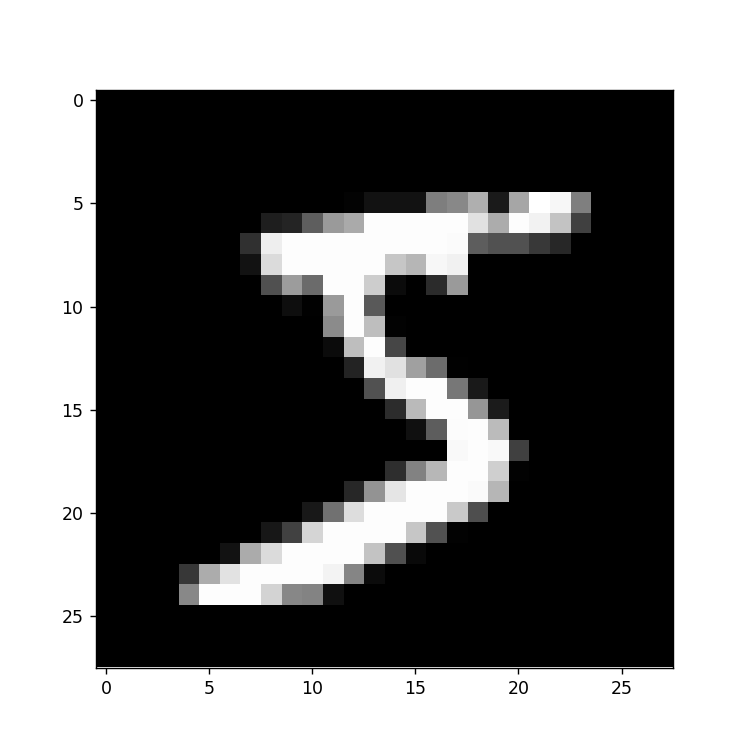

In [20]:
# An example data point
plt.figure(figsize=(6,6))
image = np.reshape(X_train[0],(28,28))
plt.imshow(image, interpolation = "none", cmap = "gray")
plt.show()

In [21]:
# Normalizing the data X => (X - Xmin)/(Xmax-Xmin) = X/255
X_train = X_train/255
X_test = X_test/255

In [22]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [23]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])
#converting the Class label into one hot encoading
y_train = np_utils.to_categorical(y_train, 10) 
y_test = np_utils.to_categorical(y_test, 10)
print("After converting the output into a vector : ",y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [24]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20

## softmax classifer

## 2 Hiden layers + BN + tanh + sigmoid + SGD

In [28]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model = Sequential()
model.add(Dense(50, activation='tanh', input_shape=(input_dim,)))
model.add(BatchNormalization())

model.add(Dense(25, activation='sigmoid'))
model.add(BatchNormalization())


model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, batch_size= 128, epochs= 20, verbose=1, validation_data=(X_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 50)                39250     
_________________________________________________________________
batch_normalization_5 (Batch (None, 50)                200       
_________________________________________________________________
dense_8 (Dense)              (None, 25)                1275      
_________________________________________________________________
batch_normalization_6 (Batch (None, 25)                100       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                260       
Total params: 41,085
Trainable params: 40,935
Non-trainable params: 150
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 90us/step - loss: 0.7532 

Test score: 0.07891933130373946
Test accuracy: 0.9773


<IPython.core.display.Javascript object>


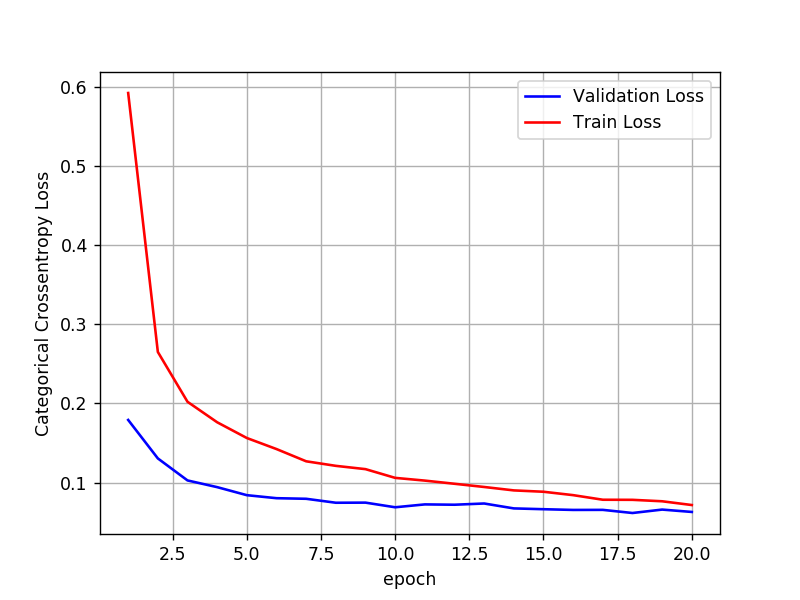

In [52]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
   
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
    
    # list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


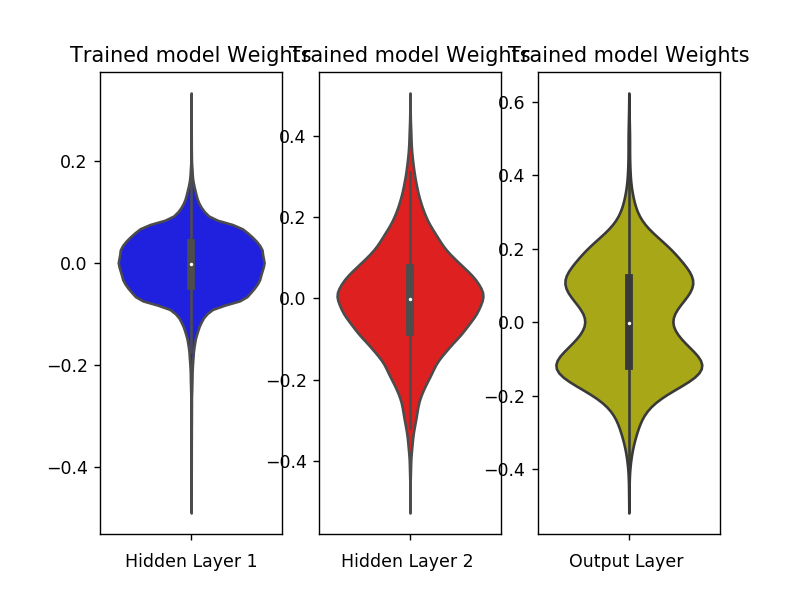

In [53]:
    w_after = model.get_weights()
    
    h1_w = w_after[0].flatten().reshape(-1,1)
    h2_w = w_after[2].flatten().reshape(-1,1)
    out_w = w_after[4].flatten().reshape(-1,1)
    
    fig = plt.figure()
    plt.title("Weight matrices after model trained")
    plt.subplot(1, 3, 1)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=h1_w,color='b')
    plt.xlabel('Hidden Layer 1')
    
    plt.subplot(1, 3, 2)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=h2_w, color='r')
    plt.xlabel('Hidden Layer 2 ')
    
    plt.subplot(1, 3, 3)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=out_w,color='y')
    plt.xlabel('Output Layer ')
    plt.show()

## 2 Hiden layer + Dropouts + Relu + tanh + Adadelta

In [31]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model = Sequential()
model.add(Dense(150, activation='relu', input_shape=(input_dim,)))
model.add(Dropout(0.5))

model.add(Dense(150, activation='tanh'))
model.add(Dropout(0.5))

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
model.compile(optimizer='Adadelta', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, batch_size= 128, epochs= 20, verbose=1, validation_data=(X_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 150)               117750    
_________________________________________________________________
dropout_5 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 150)               22650     
_________________________________________________________________
dropout_6 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1510      
Total params: 141,910
Trainable params: 141,910
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.5098 

Test score: 0.07891933130373946
Test accuracy: 0.9773


<IPython.core.display.Javascript object>


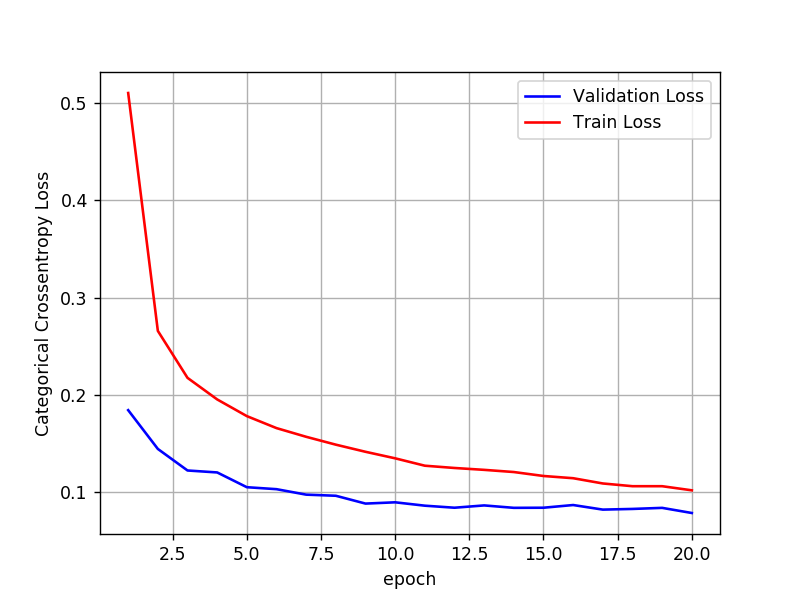

In [32]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
   
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
    
    # list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


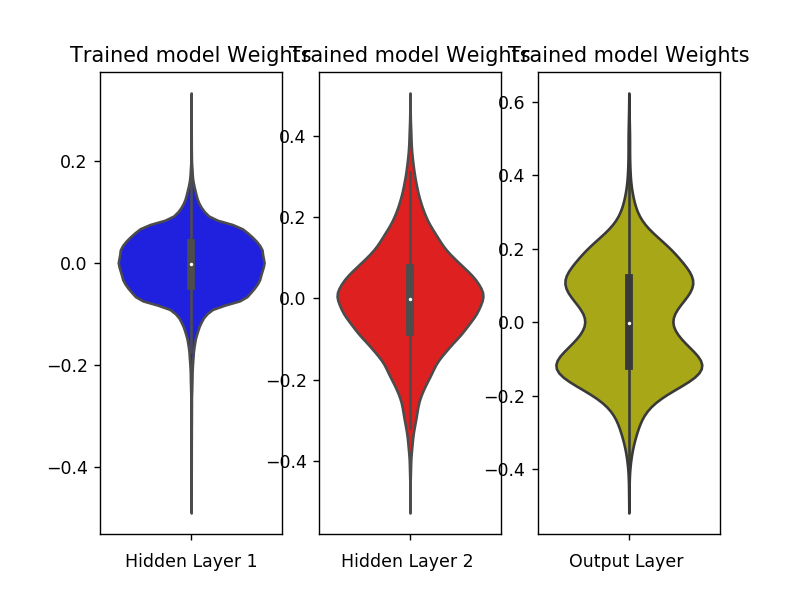

In [33]:
    w_after = model.get_weights()
    
    h1_w = w_after[0].flatten().reshape(-1,1)
    h2_w = w_after[2].flatten().reshape(-1,1)
    out_w = w_after[4].flatten().reshape(-1,1)
    
    fig = plt.figure()
    plt.title("Weight matrices after model trained")
    plt.subplot(1, 3, 1)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=h1_w,color='b')
    plt.xlabel('Hidden Layer 1')
    
    plt.subplot(1, 3, 2)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=h2_w, color='r')
    plt.xlabel('Hidden Layer 2 ')
    
    plt.subplot(1, 3, 3)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=out_w,color='y')
    plt.xlabel('Output Layer ')
    plt.show()

### 2 hidden layer + Dropouts + BN + Relu +adam

In [25]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
model = Sequential()
model.add(Dense(392, activation='relu', input_shape=(input_dim,)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(196, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, batch_size= 128, epochs= 20, verbose=1, validation_data=(X_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 392)               307720    
_________________________________________________________________
batch_normalization_3 (Batch (None, 392)               1568      
_________________________________________________________________
dropout_3 (Dropout)          (None, 392)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 196)               77028     
_________________________________________________________________
batch_normalization_4 (Batch (None, 196)               784       
_________________________________________________________________
dropout_4 (Dropout)          (None, 196)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1970      
Total para

Test score: 0.051924143326753984
Test accuracy: 0.9853


<IPython.core.display.Javascript object>


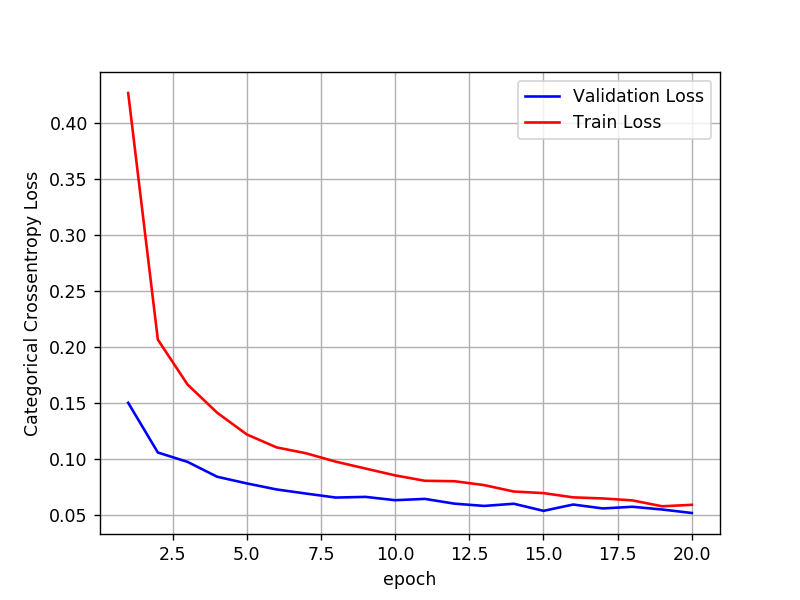

In [26]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
   
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
    
    # list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


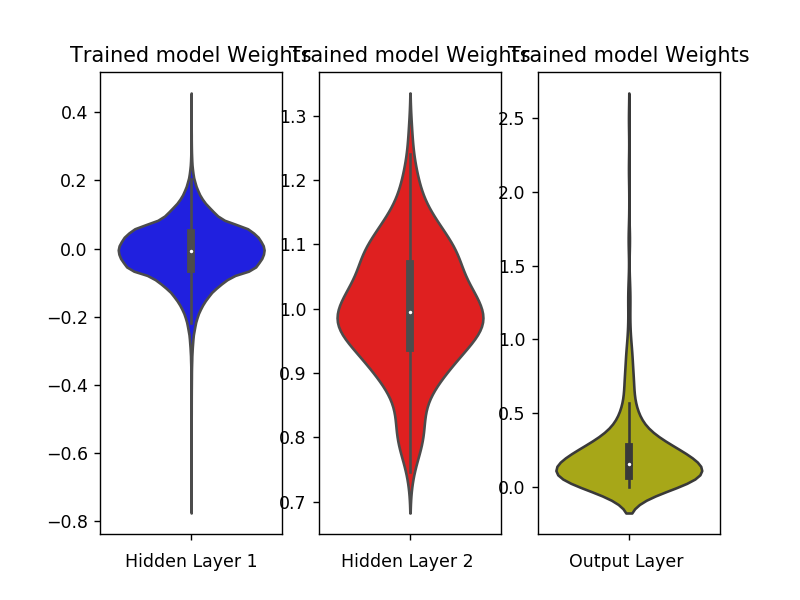

In [27]:
    w_after = model.get_weights()
    
    h1_w = w_after[0].flatten().reshape(-1,1)
    h2_w = w_after[2].flatten().reshape(-1,1)
    out_w = w_after[4].flatten().reshape(-1,1)
    
    fig = plt.figure()
    plt.title("Weight matrices after model trained")
    plt.subplot(1, 3, 1)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=h1_w,color='b')
    plt.xlabel('Hidden Layer 1')
    
    plt.subplot(1, 3, 2)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=h2_w, color='r')
    plt.xlabel('Hidden Layer 2 ')
    
    plt.subplot(1, 3, 3)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=out_w,color='y')
    plt.xlabel('Output Layer ')
    plt.show()

### 3 Hiden layer + BN + tanh + sigmoid + Adagrad

In [43]:
model_3l = Sequential()
model_3l.add(Dense(100, activation='tanh', input_shape=(input_dim,)))
model_3l.add(BatchNormalization())

model_3l.add(Dense(200, activation='sigmoid'))
model_3l.add(BatchNormalization())

model_3l.add(Dense(150, activation='tanh'))
model_3l.add(BatchNormalization())

model_3l.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
model_3l.compile(optimizer='Adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
model_3l.summary()
history = model_3l.fit(X_train, y_train, batch_size= 128, epochs= 20, verbose=1, validation_data=(X_test, y_test))
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 100)               78500     
_________________________________________________________________
batch_normalization_16 (Batc (None, 100)               400       
_________________________________________________________________
dense_26 (Dense)             (None, 200)               20200     
_________________________________________________________________
batch_normalization_17 (Batc (None, 200)               800       
_________________________________________________________________
dense_27 (Dense)             (None, 150)               30150     
_________________________________________________________________
batch_normalization_18 (Batc (None, 150)               600       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                1510      
Total para

Test score: 0.07378993242038413
Test accuracy: 0.9779


<IPython.core.display.Javascript object>


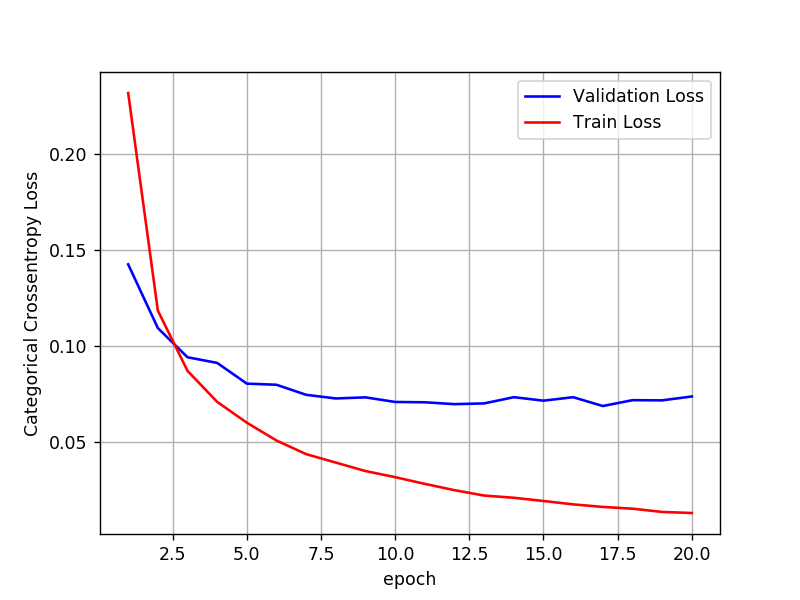

In [44]:
score = model_3l.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
   
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
    
    # list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


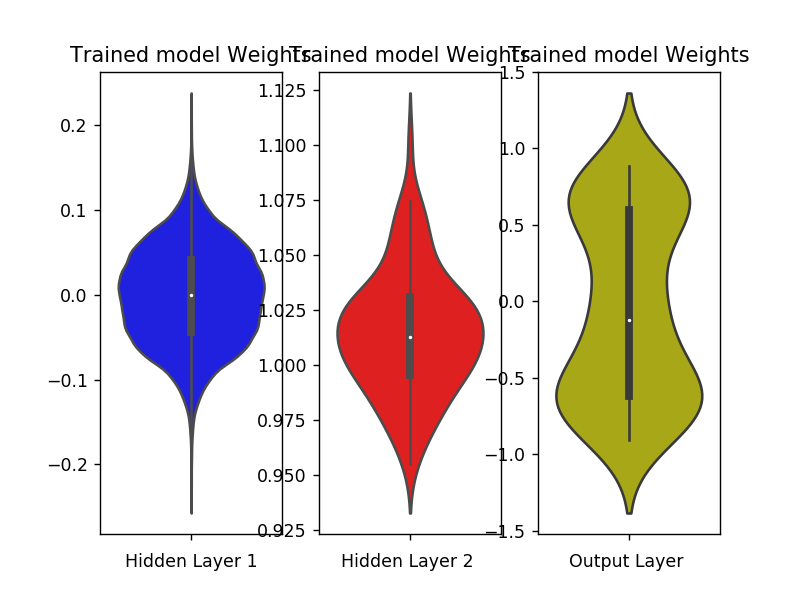

In [45]:
    w_after = model_3l.get_weights()
    
    h1_w = w_after[0].flatten().reshape(-1,1)
    h2_w = w_after[2].flatten().reshape(-1,1)
    out_w = w_after[4].flatten().reshape(-1,1)
    
    fig = plt.figure()
    plt.title("Weight matrices after model trained")
    plt.subplot(1, 3, 1)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=h1_w,color='b')
    plt.xlabel('Hidden Layer 1')
    
    plt.subplot(1, 3, 2)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=h2_w, color='r')
    plt.xlabel('Hidden Layer 2 ')
    
    plt.subplot(1, 3, 3)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=out_w,color='y')
    plt.xlabel('Output Layer ')
    plt.show()

### 3 Hiden layer + Droupouts + tanh + relu+ sigmoid + SGD

In [46]:
model_3l = Sequential()
model_3l.add(Dense(400, activation='tanh', input_shape=(input_dim,)))
model_3l.add(Dropout(0.5))

model_3l.add(Dense(200, activation='relu'))
model_3l.add(Dropout(0.5))

model_3l.add(Dense(300, activation='sigmoid'))
model_3l.add(Dropout(0.5))

model_3l.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
model_3l.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model_3l.summary()
history = model_3l.fit(X_train, y_train, batch_size= 128, epochs= 20, verbose=1, validation_data=(X_test, y_test))
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 400)               314000    
_________________________________________________________________
dropout_16 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 200)               80200     
_________________________________________________________________
dropout_17 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 300)               60300     
_________________________________________________________________
dropout_18 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)                3010      
Total para

Test score: 0.29465233832001686
Test accuracy: 0.912


<IPython.core.display.Javascript object>


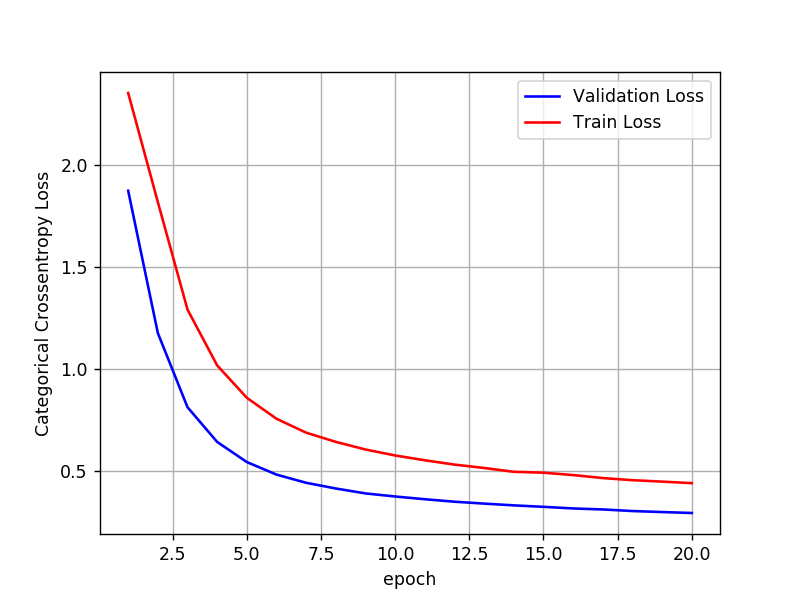

In [47]:
score = model_3l.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
   
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
    
    # list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


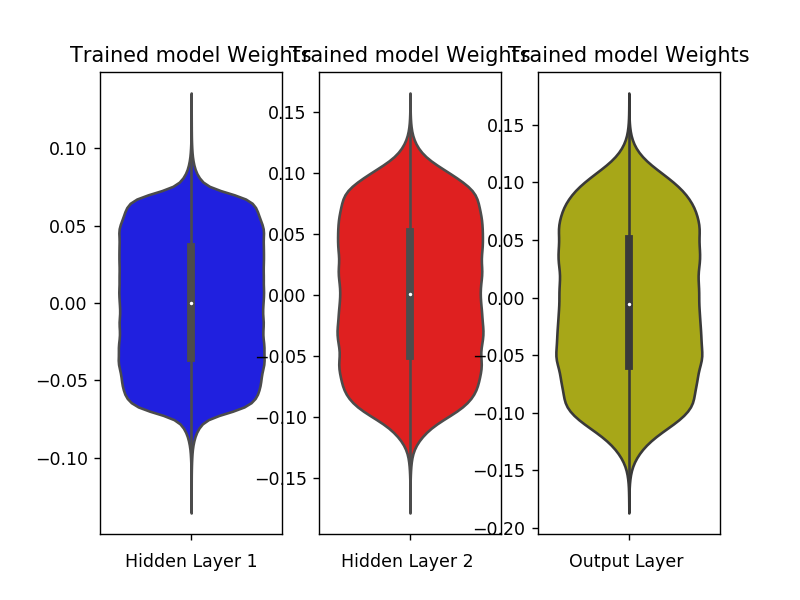

In [48]:
    w_after = model_3l.get_weights()
    
    h1_w = w_after[0].flatten().reshape(-1,1)
    h2_w = w_after[2].flatten().reshape(-1,1)
    out_w = w_after[4].flatten().reshape(-1,1)
    
    fig = plt.figure()
    plt.title("Weight matrices after model trained")
    plt.subplot(1, 3, 1)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=h1_w,color='b')
    plt.xlabel('Hidden Layer 1')
    
    plt.subplot(1, 3, 2)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=h2_w, color='r')
    plt.xlabel('Hidden Layer 2 ')
    
    plt.subplot(1, 3, 3)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=out_w,color='y')
    plt.xlabel('Output Layer ')
    plt.show()

### 3 Hiden layer  + Dropouts + BN + Relu +adam

In [49]:
model_3l = Sequential()
model_3l.add(Dense(400, activation='relu', input_shape=(input_dim,)))
model_3l.add(BatchNormalization())
model_3l.add(Dropout(0.5))

model_3l.add(Dense(200, activation='relu'))
model_3l.add(BatchNormalization())
model_3l.add(Dropout(0.5))

model_3l.add(Dense(100, activation='relu'))
model_3l.add(BatchNormalization())
model_3l.add(Dropout(0.5))

model_3l.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
model_3l.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_3l.summary()
history = model_3l.fit(X_train, y_train, batch_size= 128, epochs= 20, verbose=1, validation_data=(X_test, y_test))
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 400)               314000    
_________________________________________________________________
batch_normalization_19 (Batc (None, 400)               1600      
_________________________________________________________________
dropout_19 (Dropout)         (None, 400)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 200)               80200     
_________________________________________________________________
batch_normalization_20 (Batc (None, 200)               800       
_________________________________________________________________
dropout_20 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 100)               20100     
__________

Test score: 0.06279493801064091
Test accuracy: 0.9824


<IPython.core.display.Javascript object>


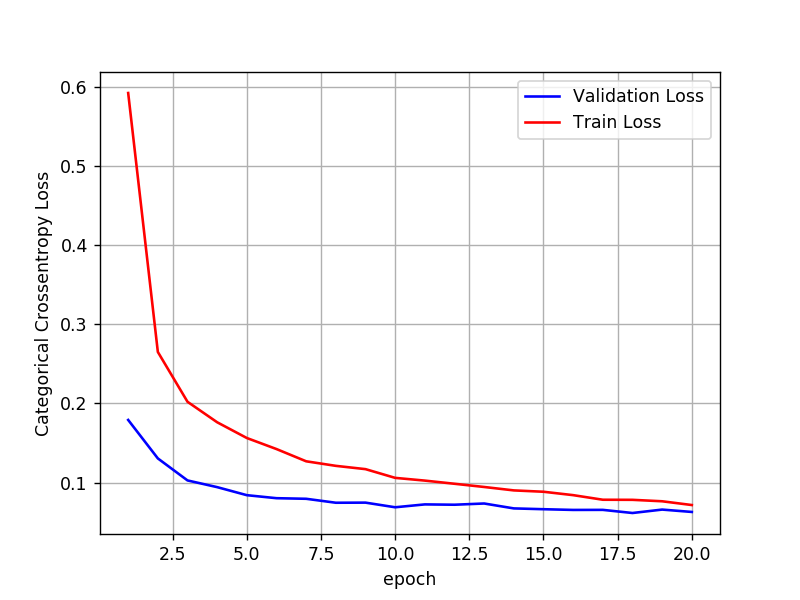

In [50]:
score = model_3l.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
   
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
    
    # list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


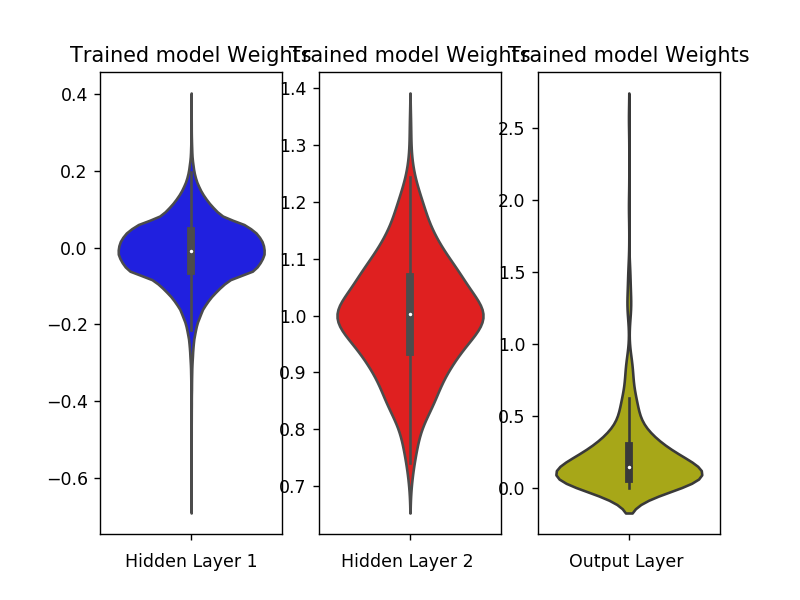

In [51]:
    w_after = model_3l.get_weights()
    
    h1_w = w_after[0].flatten().reshape(-1,1)
    h2_w = w_after[2].flatten().reshape(-1,1)
    out_w = w_after[4].flatten().reshape(-1,1)
    
    fig = plt.figure()
    plt.title("Weight matrices after model trained")
    plt.subplot(1, 3, 1)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=h1_w,color='b')
    plt.xlabel('Hidden Layer 1')
    
    plt.subplot(1, 3, 2)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=h2_w, color='r')
    plt.xlabel('Hidden Layer 2 ')
    
    plt.subplot(1, 3, 3)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=out_w,color='y')
    plt.xlabel('Output Layer ')
    plt.show()

### 5 Hiden layer  + Dropouts + tanh+sigmoid +sgd

In [54]:
model_5l = Sequential()
model_5l.add(Dense(159, activation='tanh', input_shape=(input_dim,)))
model_5l.add(Dropout(0.7))

model_5l.add(Dense(20, activation='sigmoid'))
model_5l.add(Dropout(0.4))

model_5l.add(Dense(180, activation='tanh'))
model_5l.add(Dropout(0.3))

model_5l.add(Dense(200, activation='sigmoid'))
model_5l.add(Dropout(0.2))

model_5l.add(Dense(50, activation='tanh'))
model_5l.add(Dropout(0.4))

model_5l.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
model_5l.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
model_5l.summary()
history = model_5l.fit(X_train, y_train, batch_size= 128, epochs= 20, verbose=1, validation_data=(X_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 159)               124815    
_________________________________________________________________
dropout_22 (Dropout)         (None, 159)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 20)                3200      
_________________________________________________________________
dropout_23 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 180)               3780      
_________________________________________________________________
dropout_24 (Dropout)         (None, 180)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 200)               36200     
__________

Test score: 0.8956667915344239
Test accuracy: 0.6845


<IPython.core.display.Javascript object>


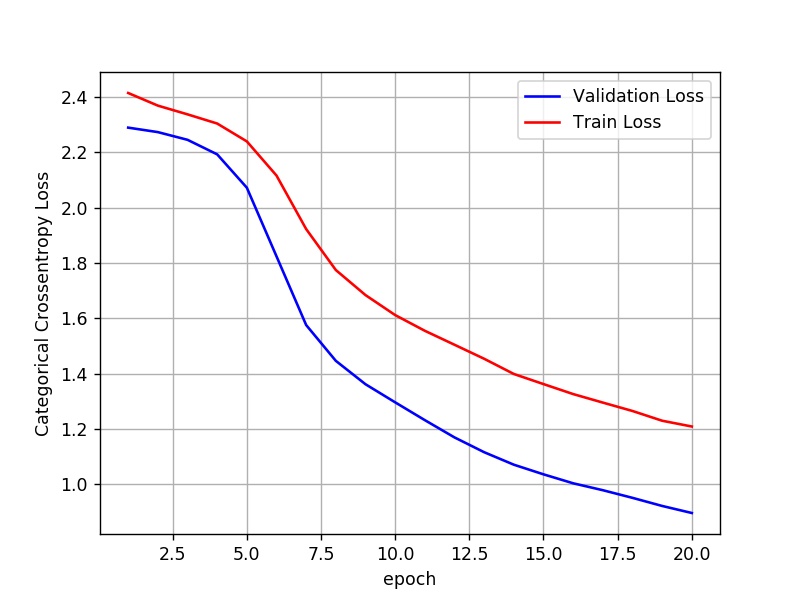

In [55]:
score = model_5l.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
   
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
    
    # list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


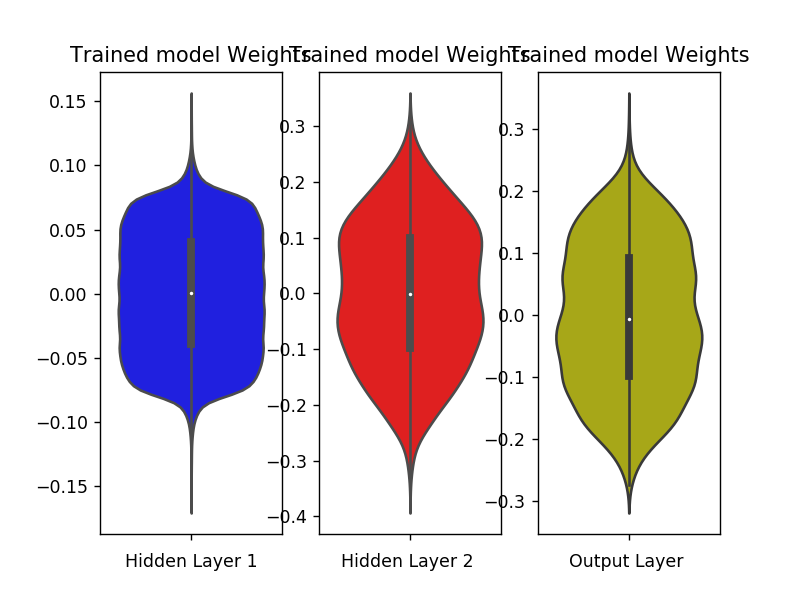

In [56]:
    w_after = model_5l.get_weights()
    
    h1_w = w_after[0].flatten().reshape(-1,1)
    h2_w = w_after[2].flatten().reshape(-1,1)
    out_w = w_after[4].flatten().reshape(-1,1)
    
    fig = plt.figure()
    plt.title("Weight matrices after model trained")
    plt.subplot(1, 3, 1)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=h1_w,color='b')
    plt.xlabel('Hidden Layer 1')
    
    plt.subplot(1, 3, 2)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=h2_w, color='r')
    plt.xlabel('Hidden Layer 2 ')
    
    plt.subplot(1, 3, 3)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=out_w,color='y')
    plt.xlabel('Output Layer ')
    plt.show()

### 5 Hiden layer + BN + Relu + sigmoid + Adagrad

In [57]:
model_5l = Sequential()
model_5l.add(Dense(100, activation='sigmoid', input_shape=(input_dim,)))
model_5l.add(BatchNormalization())

model_5l.add(Dense(200, activation='relu'))
model_5l.add(BatchNormalization())

model_5l.add(Dense(300, activation='relu'))
model_5l.add(BatchNormalization())

model_5l.add(Dense(400, activation='sigmoid'))
model_5l.add(BatchNormalization())

model_5l.add(Dense(500, activation='sigmoid'))
model_5l.add(BatchNormalization())

model_5l.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
model_5l.compile(optimizer='Adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
model_5l.summary()
history = model_5l.fit(X_train, y_train, batch_size= 128, epochs= 20, verbose=1, validation_data=(X_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 100)               78500     
_________________________________________________________________
batch_normalization_22 (Batc (None, 100)               400       
_________________________________________________________________
dense_44 (Dense)             (None, 200)               20200     
_________________________________________________________________
batch_normalization_23 (Batc (None, 200)               800       
_________________________________________________________________
dense_45 (Dense)             (None, 300)               60300     
_________________________________________________________________
batch_normalization_24 (Batc (None, 300)               1200      
_________________________________________________________________
dense_46 (Dense)             (None, 400)               120400    
__________

Test score: 0.09277895443839333
Test accuracy: 0.979


<IPython.core.display.Javascript object>


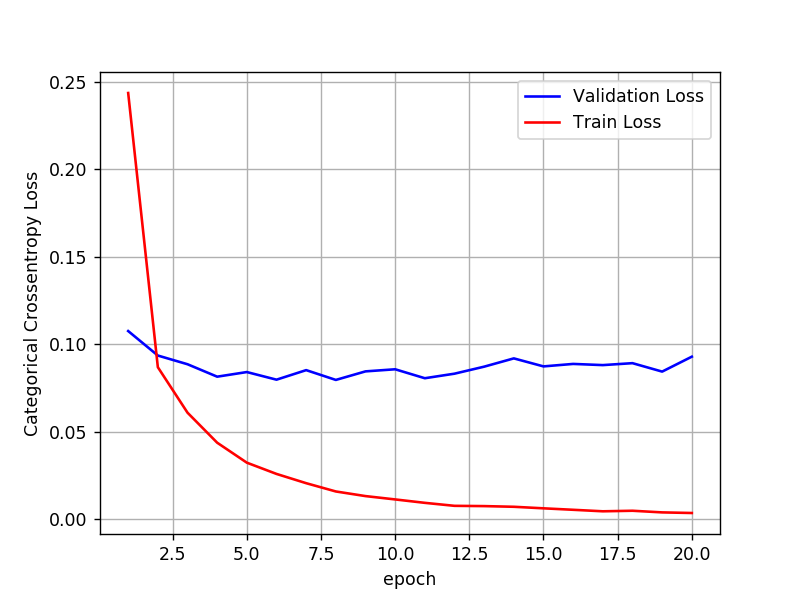

In [58]:
score = model_5l.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
   
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
    
    # list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


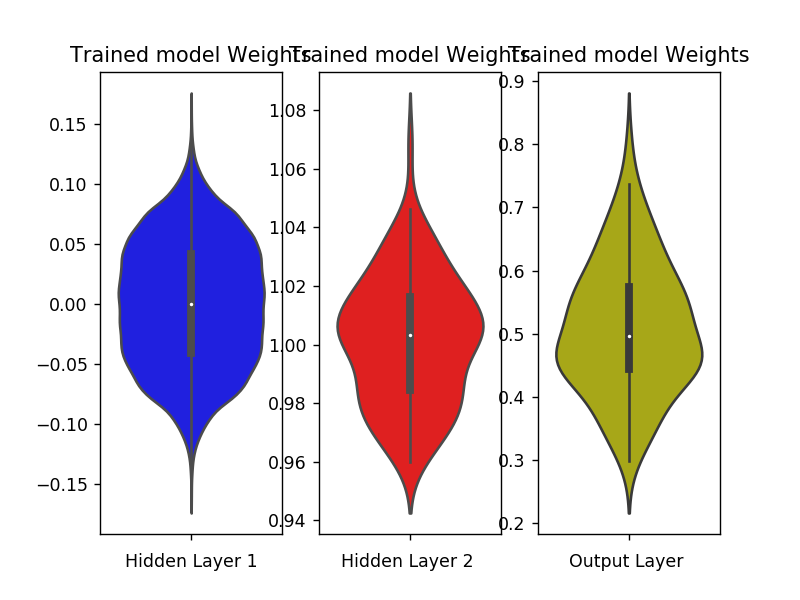

In [59]:
    w_after = model_5l.get_weights()
    
    h1_w = w_after[0].flatten().reshape(-1,1)
    h2_w = w_after[2].flatten().reshape(-1,1)
    out_w = w_after[4].flatten().reshape(-1,1)
    
    fig = plt.figure()
    plt.title("Weight matrices after model trained")
    plt.subplot(1, 3, 1)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=h1_w,color='b')
    plt.xlabel('Hidden Layer 1')
    
    plt.subplot(1, 3, 2)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=h2_w, color='r')
    plt.xlabel('Hidden Layer 2 ')
    
    plt.subplot(1, 3, 3)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=out_w,color='y')
    plt.xlabel('Output Layer ')
    plt.show()

### 5 Hiden layer  + Tanh + sigmoid + Relu + Adadelta

In [60]:
model_5l = Sequential()
model_5l.add(Dense(50, activation='tanh', input_shape=(input_dim,)))


model_5l.add(Dense(100, activation='sigmoid'))


model_5l.add(Dense(150, activation='relu'))

model_5l.add(Dense(100, activation='relu'))

model_5l.add(Dense(50, activation='tanh'))

model_5l.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
model_5l.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])
model_5l.summary()
history = model_5l.fit(X_train, y_train, batch_size= 128, epochs= 20, verbose=1, validation_data=(X_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_50 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_51 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_52 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_53 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_54 (Dense)             (None, 10)                510       
Total params: 80,160
Trainable params: 80,160
Non-trainable params: 0
_________________________________________________________________
Train 

Test score: 0.11582111745460424
Test accuracy: 0.971


<IPython.core.display.Javascript object>


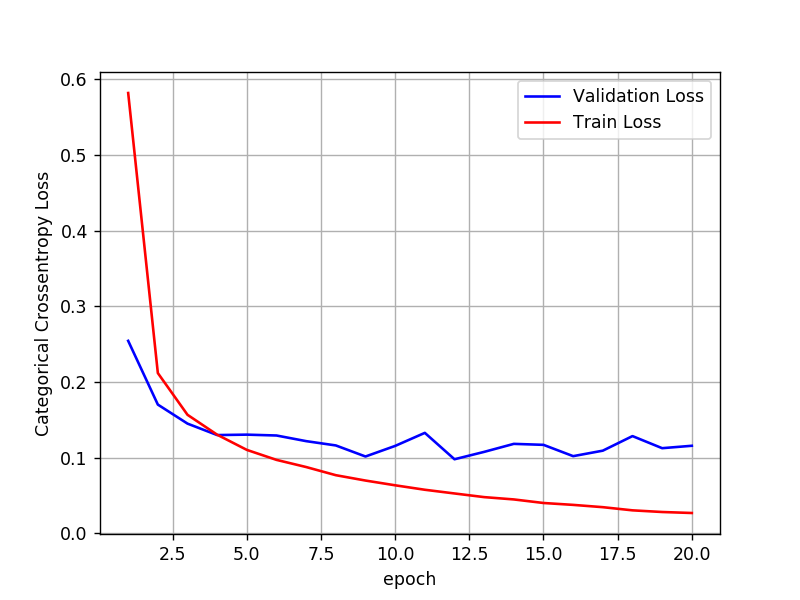

In [61]:
score = model_5l.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
   
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
    
    # list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


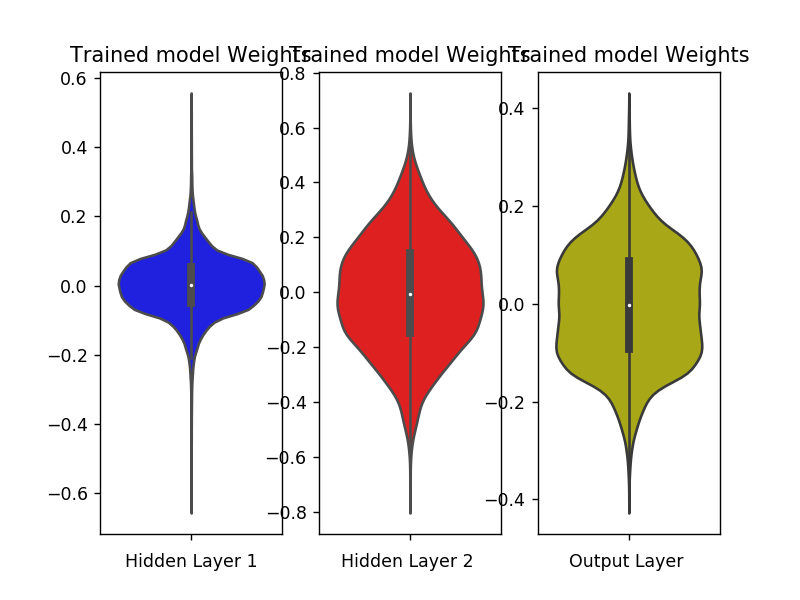

In [62]:
    w_after = model_5l.get_weights()
    
    h1_w = w_after[0].flatten().reshape(-1,1)
    h2_w = w_after[2].flatten().reshape(-1,1)
    out_w = w_after[4].flatten().reshape(-1,1)
    
    fig = plt.figure()
    plt.title("Weight matrices after model trained")
    plt.subplot(1, 3, 1)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=h1_w,color='b')
    plt.xlabel('Hidden Layer 1')
    
    plt.subplot(1, 3, 2)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=h2_w, color='r')
    plt.xlabel('Hidden Layer 2 ')
    
    plt.subplot(1, 3, 3)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=out_w,color='y')
    plt.xlabel('Output Layer ')
    plt.show()

### 5 Hiden layer  + Dropouts + BN + Relu +adam

In [55]:
model_5l = Sequential()
model_5l.add(Dense(500, activation='relu', input_shape=(input_dim,)))
model_5l.add(BatchNormalization())
model_5l.add(Dropout(0.5))

model_5l.add(Dense(400, activation='relu'))
model_5l.add(BatchNormalization())
model_5l.add(Dropout(0.5))

model_5l.add(Dense(300, activation='relu'))
model_5l.add(BatchNormalization())
model_5l.add(Dropout(0.5))

model_5l.add(Dense(200, activation='relu'))
model_5l.add(BatchNormalization())
model_5l.add(Dropout(0.5))

model_5l.add(Dense(100, activation='relu'))
model_5l.add(BatchNormalization())
model_5l.add(Dropout(0.5))

model_5l.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))
model_5l.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_5l.summary()
history = model_5l.fit(X_train, y_train, batch_size= 128, epochs= 20, verbose=1, validation_data=(X_test, y_test))
    

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 500)               392500    
_________________________________________________________________
batch_normalization_6 (Batch (None, 500)               2000      
_________________________________________________________________
dropout_6 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 400)               200400    
_________________________________________________________________
batch_normalization_7 (Batch (None, 400)               1600      
_________________________________________________________________
dropout_7 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 300)               120300    
__________

Test score: 0.06524868124960921
Test accuracy: 0.9836


<IPython.core.display.Javascript object>


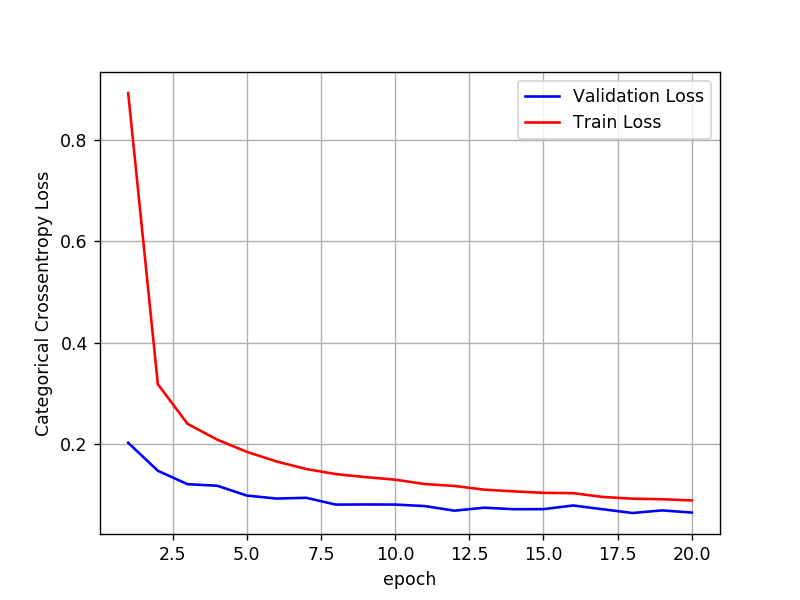

In [56]:
score = model_5l.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
   
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
    
    # list of epoch numbers
x = list(range(1,nb_epoch+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


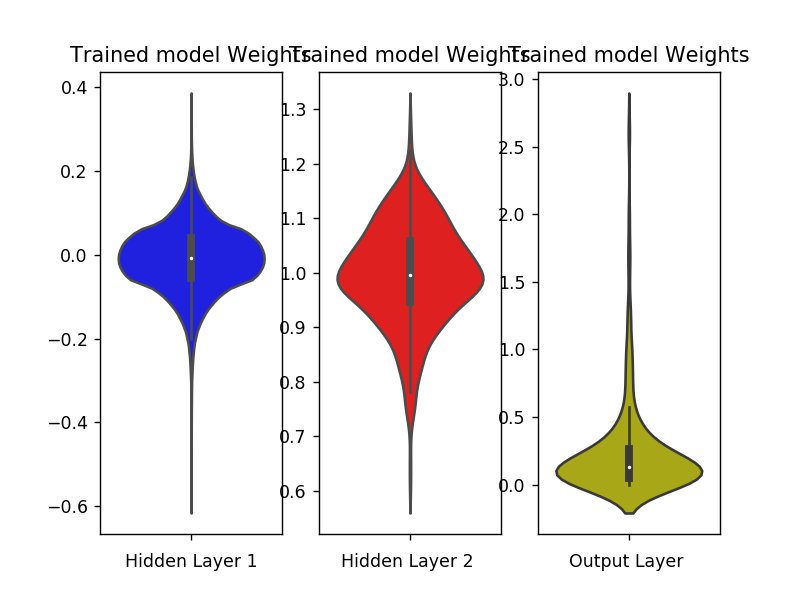

In [57]:
    w_after = model_5l.get_weights()
    
    h1_w = w_after[0].flatten().reshape(-1,1)
    h2_w = w_after[2].flatten().reshape(-1,1)
    out_w = w_after[4].flatten().reshape(-1,1)
    
    fig = plt.figure()
    plt.title("Weight matrices after model trained")
    plt.subplot(1, 3, 1)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=h1_w,color='b')
    plt.xlabel('Hidden Layer 1')
    
    plt.subplot(1, 3, 2)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=h2_w, color='r')
    plt.xlabel('Hidden Layer 2 ')
    
    plt.subplot(1, 3, 3)
    plt.title("Trained model Weights")
    ax = sns.violinplot(y=out_w,color='y')
    plt.xlabel('Output Layer ')
    plt.show()

# Conclusions

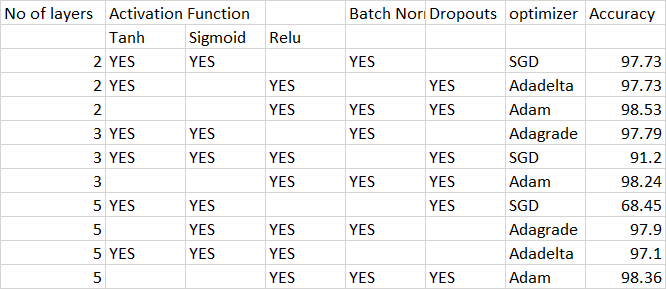

1) From the above table we got 98.53% accuracy for 2-hidden layered MLP with relu activation and adam optimizer

2) But in the case of 5-hidden layered MLP with SGD optimizer performed poor with accuracy 68.45. This is because SGD takes more epocs to find the global minima and SGD is computationaly faster

3) In all the MLP layers, the models which has Adam optimizer performed well and itr took more time when compared to the other optimizers

4) The model will perform better even we choose less number of hidden layers, when best optimizer is choosen with Batchnormalization and Dropots.